In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


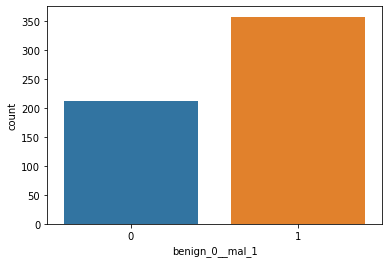

In [8]:
sns.countplot('benign_0__mal_1',data=df)

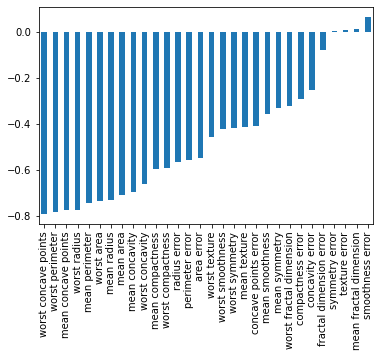

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

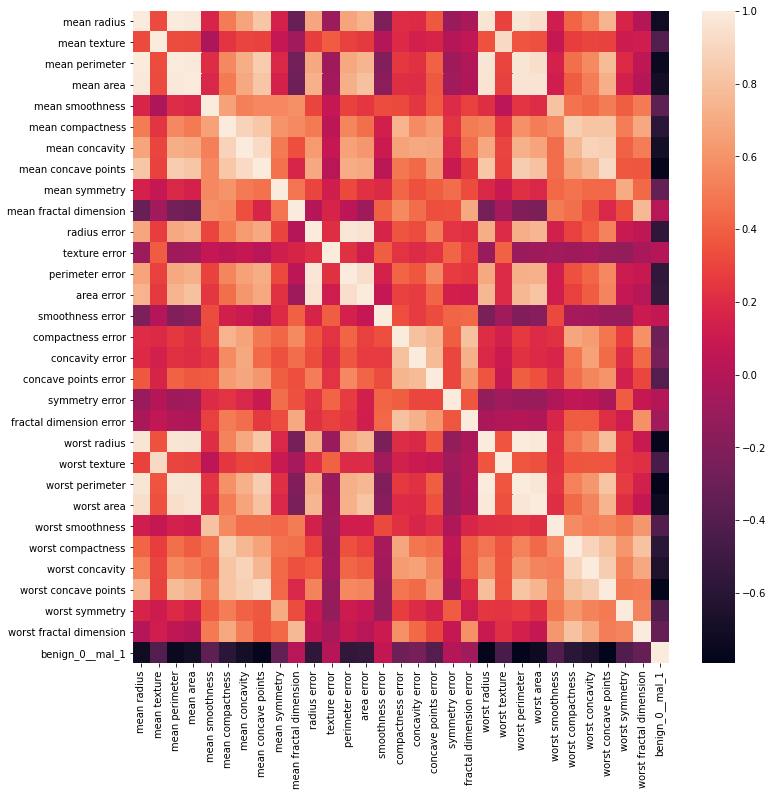

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [17]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [33]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [42]:
X_train.shape

(426, 30)

In [43]:
X_test.shape

(143, 30)

In [47]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 31ms/step - loss: 0.6812 - val_loss: 0.6649
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6507 - val_loss: 0.6395
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6227 - val_loss: 0.6113
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5914 - val_loss: 0.5754
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5532 - val_loss: 0.5340
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5089 - val_loss: 0.4842
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4526 - val_loss: 0.4201
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3952 - val_loss: 0.3725
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3536 - val_loss: 0.3286
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3189 - val_loss: 0.2903
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.0521 - val_loss: 0.1176
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0517 - val_loss: 0.1200
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0518 - val_loss: 0.1204
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0517 - val_loss: 0.1157
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0561 - val_loss: 0.1288
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0580 - val_loss: 0.1226
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.1217
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0557 - val_loss: 0.1192
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0526 - val_loss: 0.1195
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.1202
Epoch 93/600


14/14 [==============================] - 0s 5ms/step - loss: 0.0419 - val_loss: 0.1337
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.1395
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.1400
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0435 - val_loss: 0.1319
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0391 - val_loss: 0.1377
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.1282
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0400 - val_loss: 0.1349
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.1324
Epoch 172/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0395 - val_loss: 0.1399
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0381 - val_loss: 0.1339
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.1529
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.1431
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0321 - val_loss: 0.1487
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0318 - val_loss: 0.1494
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0321 - val_loss: 0.1503
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0348 - val_loss: 0.1506
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0321 - val_loss: 0.1447
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0351 - val_loss: 0.1563
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0325 - val_loss: 0.1464
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0317 - val_loss: 0.1514
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.1653
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.1741
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0260 - val_loss: 0.1706
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0261 - val_loss: 0.1787
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.1728
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.1650
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0252 - val_loss: 0.1842
Epoch 333/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0283 - val_loss: 0.1642
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0249 - val_loss: 0.1707
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.1720
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.1890
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0219 - val_loss: 0.2110
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0219 - val_loss: 0.1822
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0229 - val_loss: 0.2010
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0196 - val_loss: 0.1924
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.1980
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.1961
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.1895
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.2044
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0231 - val_loss: 0.1868
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.2561
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.2328
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.2560
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.2521
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.2421
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.2413
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.2497
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.2351
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.2607
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.2500
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.3078
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.3108
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.3083
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.2976
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.3215
Epoch 574/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0115 - val_loss: 0.3116
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.3013
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0091 - val_loss: 0.3212
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.2852
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.3233
Epoc

In [51]:
losses = pd.DataFrame(model.history.history)

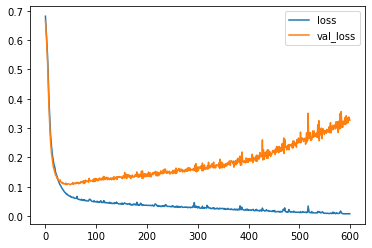

In [52]:
losses.plot()

In [53]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [56]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 22ms/step - loss: 0.6838 - val_loss: 0.6688
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6568 - val_loss: 0.6415
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6263 - val_loss: 0.6072
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5865 - val_loss: 0.5624
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5416 - val_loss: 0.5129
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4913 - val_loss: 0.4597
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4391 - val_loss: 0.4068
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3909 - val_loss: 0.3604
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3491 - val_loss: 0.3173
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3137 - val_loss: 0.2850
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.1139
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0515 - val_loss: 0.1113
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0516 - val_loss: 0.1150
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0513 - val_loss: 0.1120
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.1215
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0528 - val_loss: 0.1103
Epoch 00088: early stopping


In [57]:
model_loss = pd.DataFrame(model.history.history)

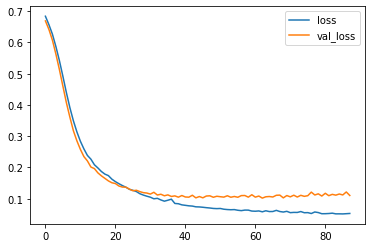

In [58]:
model_loss.plot()

In [87]:
from tensorflow.keras.layers import Dropout

In [118]:
model1 = Sequential()

model1.add(Dense(30,activation='relu'))

model1.add(Dropout(0.5))

model1.add(Dense(15,activation='relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam')

In [119]:
model1.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 737us/sample - loss: 0.6901 - val_loss: 0.6550
Epoch 2/600
426/426 [==============================] - 0s 87us/sample - loss: 0.6722 - val_loss: 0.6300
Epoch 3/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6572 - val_loss: 0.6054
Epoch 4/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6299 - val_loss: 0.5771
Epoch 5/600
 32/426 [=>............................] - ETA: 0s - loss: 0.5881

C:\Users\worldclass\anaconda3\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


426/426 [==============================] - 0s 66us/sample - loss: 0.5940 - val_loss: 0.5502
Epoch 6/600
426/426 [==============================] - 0s 94us/sample - loss: 0.5711 - val_loss: 0.5195
Epoch 7/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5835 - val_loss: 0.4983
Epoch 8/600
426/426 [==============================] - 0s 82us/sample - loss: 0.5331 - val_loss: 0.4749
Epoch 9/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5166 - val_loss: 0.4458
Epoch 10/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5016 - val_loss: 0.4236
Epoch 11/600
426/426 [==============================] - 0s 68us/sample - loss: 0.5008 - val_loss: 0.4032
Epoch 12/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4717 - val_loss: 0.3772
Epoch 13/600
426/426 [==============================] - 0s 68us/sample - loss: 0.4372 - val_loss: 0.3554
Epoch 14/600
426/426 [==============================] - 0s 70us/sample 

426/426 [==============================] - 0s 82us/sample - loss: 0.1181 - val_loss: 0.0919
Epoch 84/600
426/426 [==============================] - 0s 84us/sample - loss: 0.1005 - val_loss: 0.0890
Epoch 85/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1043 - val_loss: 0.0888
Epoch 86/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1080 - val_loss: 0.1066
Epoch 87/600
426/426 [==============================] - 0s 68us/sample - loss: 0.1341 - val_loss: 0.0951
Epoch 88/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0960 - val_loss: 0.0884
Epoch 89/600
426/426 [==============================] - 0s 68us/sample - loss: 0.1047 - val_loss: 0.0955
Epoch 90/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1062 - val_loss: 0.0960
Epoch 91/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1205 - val_loss: 0.1034
Epoch 92/600
426/426 [==============================] - 0s 68us/samp

In [120]:
model_loss = pd.DataFrame(model1.history.history)

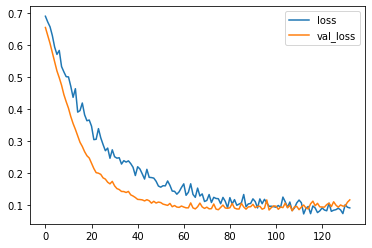

In [121]:
model_loss.plot()

In [83]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [123]:
#predictions = model1.predict_classes(X_test)
#predictions = model.predict>0.5.astype('int32')
predictions=model.predict(X_test)
predictions = predictions > 0.5
#classes_x=np.argmax(predictions,axis=-1)
#classes_x=np.argmax(predictions,axis=1)

In [124]:
from sklearn.metrics import classification_report,confusion_matrix

In [125]:
predictions

array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [

In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [127]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
